In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

Задача.

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Time of generation =  0.0029926300048828125


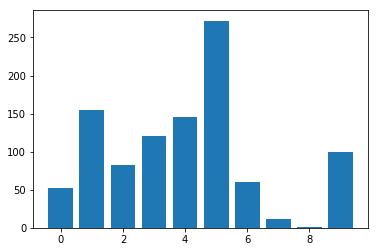

In [53]:
start = time.time()
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a/=a.sum()
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.show()

Задача

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

Time of generation =  0.0029745101928710938


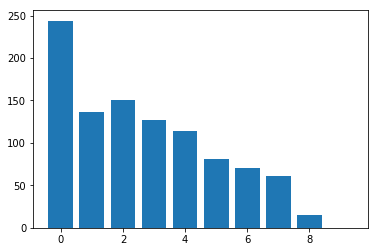

In [62]:
start = time.time()
a = np.sort(a)[::-1]
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.show()

Задача

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

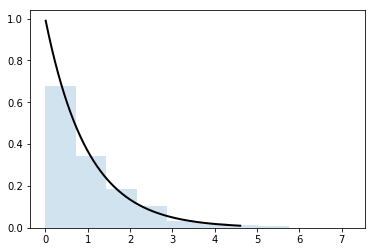

In [70]:
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 1000)
rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
# ax.legend(r,loc='best', frameon=False)
plt.show()

Задача

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

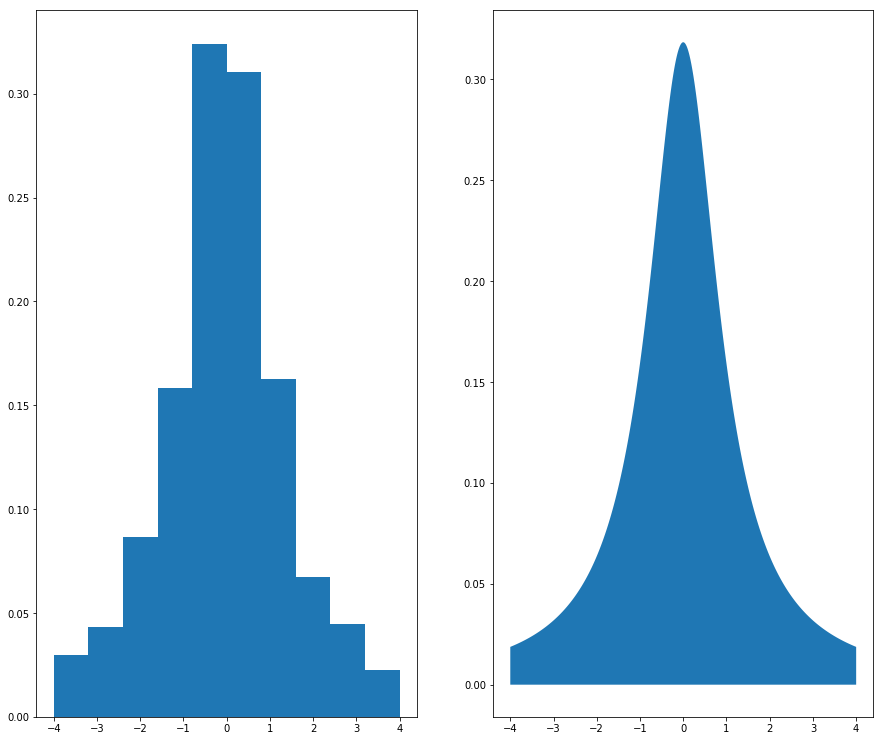

In [79]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 1000)

plt.figure(figsize=(15,13))
plt.subplot(1,2,1)

random = np.random.standard_cauchy(1000)
plt.hist(random,range=(-4,4),density=True)

plt.subplot(1,2,2)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

Задача

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

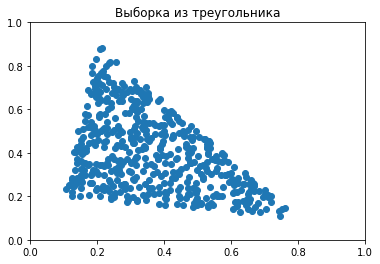

In [90]:
import math
xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2

plt.scatter(xrand, yrand)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка из треугольника")
plt.show()

Задача

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.



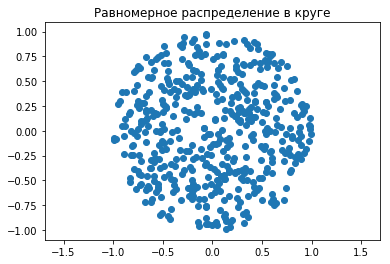

In [104]:
from matplotlib import pyplot as plt
import numpy as np

rho = np.sqrt(np.random.uniform(0, 1, 500))
phi = np.random.uniform(0, 2*np.pi, 500)

x = rho * np.cos(phi)
y = rho * np.sin(phi)

plt.scatter(x, y)
plt.title('Равномерное распределение в круге')
plt.axis('equal')
plt.show()

Задача

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

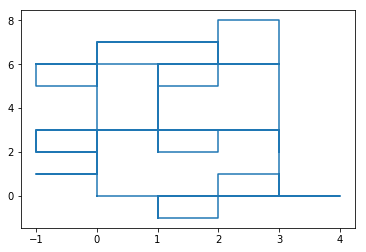

In [112]:
import pylab
import random
n=100
xindex = np.zeros(100)
yindex = np.zeros(100)
def walk(n):
    xindex = np.random.choice(n, n//2, replace = False)
    yindex = np.random.choice(n, n//2, replace = False)

    x_ = x = np.array([sum([[1,-1][i in xindex] for i in range(n)][:j]) for j in range(n+1)])
    y = np.array([sum([[1,-1][i in yindex] for i in range(n)][:j]) for j in range(n+1)])
    
    x = x_*(1/2)+y*(1/2)
    y = x_*(-1/2)+y*(1/2)
    return x,y
x1,y1 = walk(100)

plt.plot(x1,y1)
plt.show()

Задача

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.



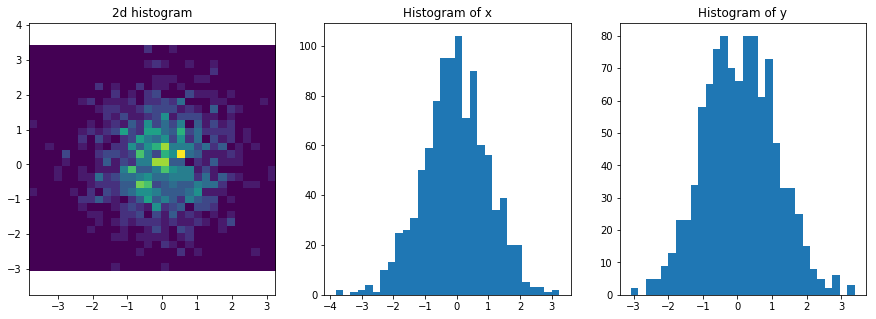

In [119]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

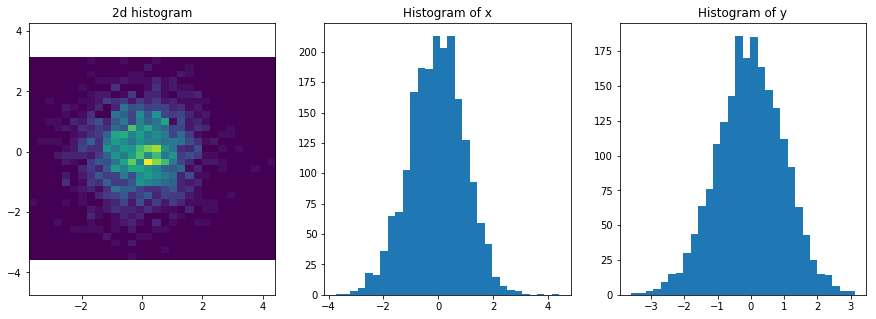

In [128]:
#Модифицруем метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos.
n = 2000
i = 0
u1 = np.array([])
u2 = np.array([])
while i<n:
    u, v = 2*np.random.rand(2,1)-1
    s1 = u**2+v**2
    if 0<s1<=1:
        u1 = np.append(u1, u)
        u2 = np.append(u2, v)
        i+=1

s = u1**2+u2**2
r = np.sqrt(-2 * np.log(s)/s)
x = u1 * r
y = u2 * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

С помощью модивицированного метода смоделируем выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и
ковариационной матрицей ((2, 1), (1, 4)). Построим 2D гистограмму полученного распределения.
Двумерное гауссовское распределение выглядит следующим образом: X = (ksi,eta) = A(x,y)+(m1,m2), где А - матрица 2х2, (m1,m2) - 
вектор средних, то есть (m1,m2) = (3,6), а (х,у) - н.о.р. N(0,1). Чтобы определить числа a,b,c,d матрицы А = ((a, b), (c, d)),
воспользуемся известной ковариационной матрицей ((2, 1), (1, 4)). Но поскольку у нас получится только 3 равенства (т.к. матрица
ковариаций симметрична), положим d=2.

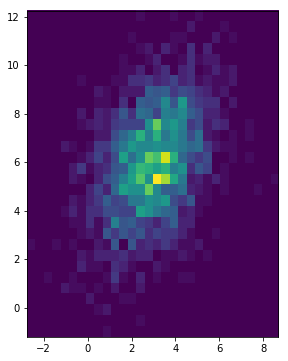

In [135]:
d = 2
c = np.sqrt(4-d**2)
b = 1/d
a = np.sqrt(2-b**2)
ksi = a*x+b*y+3
eta = c*x+d*y+6
plt.figure(figsize=(4.5,6))
plt.hist2d(ksi, eta, bins=30)
plt.show()

Практическое задание

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [139]:
n = 100
def subsets(n):
    Bells_number = 0
    for k in range(1,100):
        Bells_number+=k**n/np.math.factorial(k)
    Bells_number*=1/np.exp(1)
    part = np.array([k**n/(np.math.factorial(k)*np.exp(1)*Bells_number) for k in range(1,101)])
    summ_p = [part[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<summ_p[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    part = np.array([1/r for i in range(r)])
    summ_p = [part[:i].sum() for i in range(1,r+1)]
    a = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ_p[k]:
                c.append(k)
                k=-1
            else:
                k+=1

С помощью ЗБЧ мы можем оценить ожидаемое число подмножеств в случайном разбиении 100-элементного множества.

In [146]:
EX = 0
for i in range(10000):
    c = []
    subsets(n)
    EX+=len(np.unique(c))
EX/=10000
print(EX)

28.6147
